# Infiltration Characteristics of B Cells and Plasma Cells in Gastric Mucosal with H. pylori Infection.

In [1]:
import anndata as ad
import scanpy as sc
import omicverse as ov


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.10, Tutorials: https://omicverse.readthedocs.io/


In [2]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
adata = sc.read_h5ad('Gastric/Data/Gastric_B_Annotation.h5ad')
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata,adata_raw

(AnnData object with n_obs × n_vars = 16603 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'B_celltype'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'B_celltype_colors', 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     varm: 'PCs'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 63398 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total

In [4]:
adata.uns['B_celltype_colors'] = ov.pl.blue_color[3:8]


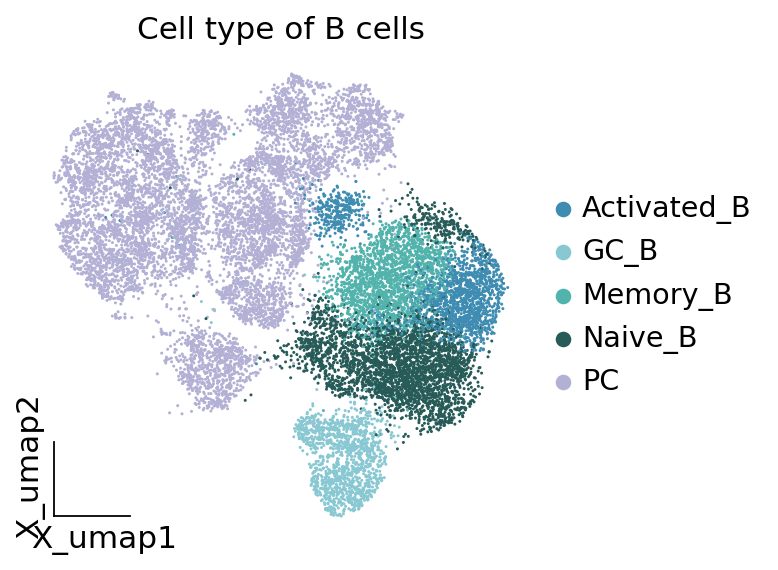

In [5]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots( figsize = (4,4))
ax = ov.utils.embedding(adata,
                basis='X_umap',
                color=['B_celltype'],
                title='Cell type of B cells',
                frameon='small',
                show=False,
                ax=ax)

plt.savefig("Gastric/Figure/sFigure6/sFigure6_A.png",dpi=300,bbox_inches = 'tight')

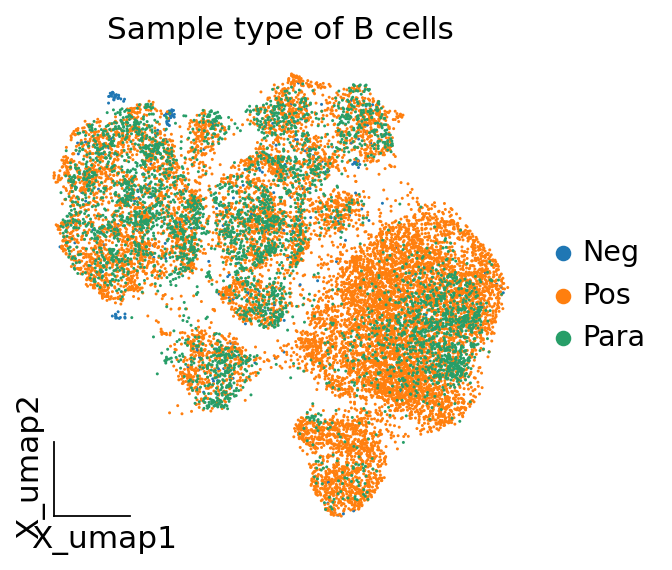

In [6]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots( figsize = (4,4))
ax = ov.utils.embedding(adata,
                basis='X_umap',
                color=['Sample'],
                title='Sample type of B cells',
                frameon='small',
                show=False,
                ax=ax)

plt.savefig("Gastric/Figure/sFigure6/sFigure6_B.png",dpi=300,bbox_inches = 'tight')

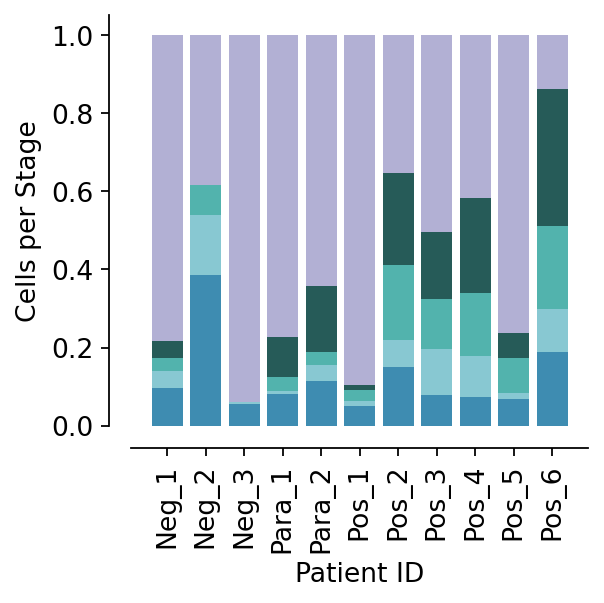

In [7]:
ax = ov.utils.plot_cellproportion(adata=adata,celltype_clusters='B_celltype',
                    visual_clusters='Person',
                    visual_name='Patient ID',figsize=(4,4))
plt.savefig("Gastric/Figure/sFigure6/sFigure6_C.png",dpi=300,bbox_inches = 'tight')

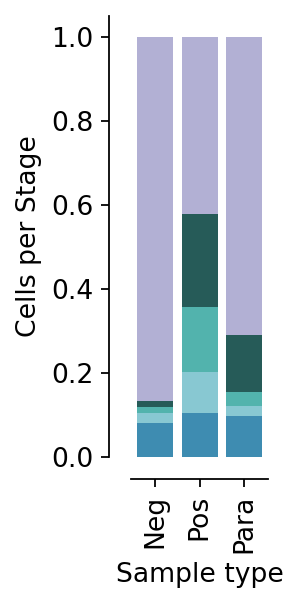

In [8]:
ax = ov.utils.plot_cellproportion(adata=adata,celltype_clusters='B_celltype',
                    visual_clusters='Sample',
                    visual_name='Sample type',figsize=(2,4))
plt.savefig("Gastric/Figure/sFigure6/sFigure6_D.png",dpi=300,bbox_inches = 'tight')

In [9]:
marker_genes_dict = {
    'Activated_B':['BCL2A1','EGR1','CD69','DUSP2','JUN'],
    'GC_B':['LMO2','GMDS','PRPSAP2','SERPINA9','MARCKSL1'],
    'Mermory_B':['GPR183','TNFRSF13B'],
    'Naive_B':['FCER2','FCMR','SELL','IGHD'],
    'PC':['IGHA1','IGHA2','SDC1','JCHAIN'],
}

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_B_celltype']`


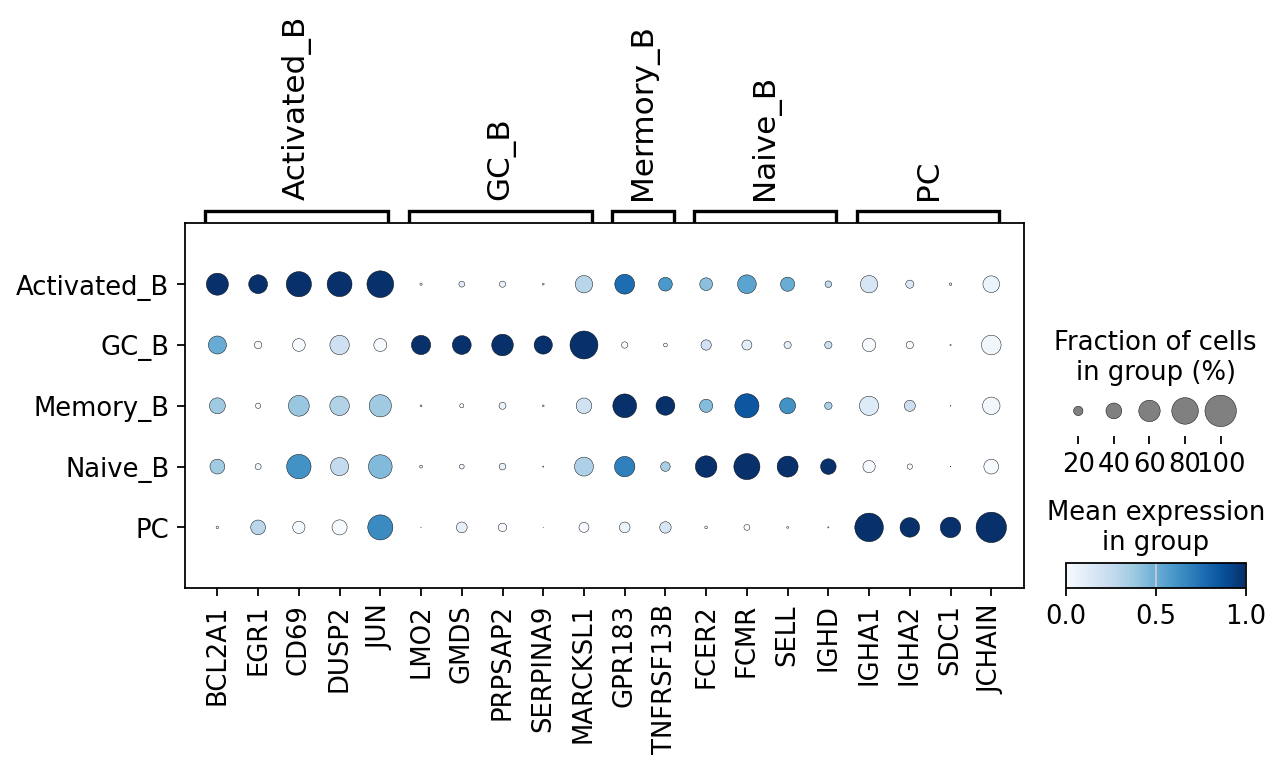

In [10]:
sc.tl.dendrogram(adata,groupby='B_celltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby='B_celltype',
    dendrogram=False,
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, # 是否需要var
    figsize=(8.5,3),
    return_fig=False,
    show=False,
    cmap='Blues'
)

plt.savefig("Gastric/Figure/sFigure6/sFigure6_E.png",dpi=300,bbox_inches = 'tight')

In [11]:
adata.X.max()

10.0

In [12]:
B_raw = adata_raw[adata.obs_names,:]

B_raw.obs = adata.obs
#normalize and high variable genes (HVGs) calculated
B_raw=ov.pp.preprocess(B_raw,mode='shiftlog|pearson',n_HVGs=3000,)

#save the whole genes and filter the non-HVGs
B_raw.raw = B_raw
B_raw = B_raw[:, B_raw.var.highly_variable_features]

B_raw.layers['lognorm'] = B_raw.X
B_raw

Begin robust gene identification
After filtration, 28000/32559 genes are kept. Among 28000 genes, 20082 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['AC233755.1', 'AC233755.2', 'GKN1', 'HBB', 'IGHA1', 'IGHA2', 'IGHG1', 'IGHG3', 'IGHM', 'IGHV1-18', 'IGHV1-2', 'IGHV1-24', 'IGHV1-3', 'IGHV1-46', 'IGHV1-58', 'IGHV1-69', 'IGHV1-69-2', 'IGHV1-69D', 'IGHV2-26', 'IGHV2-5', 'IGHV2-70', 'IGHV2-70D', 'IGHV3-11', 'IGHV3-13', 'IGHV3-15', 'IGHV3-20', 'IGHV3-21', 'IGHV3-23', 'IGHV3-30', 'IGHV3-33', 'IGHV3-43', 'IGHV3-48', 'IGHV3-49', 'IGHV3-53', 'IGHV3-64', 'IGHV3-64D', 'IGHV3-66', 'IGHV3-7', 'IGHV3-72', 'IGHV3-73', 'IGHV3-74', 'IGHV4-28', 'IGHV4-31', 'IGHV4-34', 'IGHV4-39', 'IGHV4-4', 'IGHV4-55', 'IGHV4-59', 'IGHV4-61', 'IGHV5-10-1', 'IGHV5-51', 'IGHV6-1', 'IGHV7-4-1', 'IGKC', 'IGKV1-12', 'IGKV1-16', 'IGKV1

AnnData object with n_obs × n_vars = 16603 × 3000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'B_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts', 'lognorm'
    obsp: 'connectivities', 'distances'

In [13]:
set(B_raw.obs['B_celltype'])

{'Activated_B', 'GC_B', 'Memory_B', 'Naive_B', 'PC'}

In [14]:
# PC
dds=ov.bulk.pyDEG(B_raw.to_df().T)
dds.drop_duplicates_index()
print('... drop_duplicates_index success')
treatment_groups=B_raw[(B_raw.obs['B_celltype']=='PC')&(B_raw.obs['Sample']=='Para')].obs.index.tolist()
control_groups=B_raw[(B_raw.obs['B_celltype']=='PC')&(B_raw.obs['Sample']=='Pos')].obs.index.tolist()
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=1,
                   pval_threshold=0.05,
                   logp_max=100)


... drop_duplicates_index success
... Fold change threshold: 1


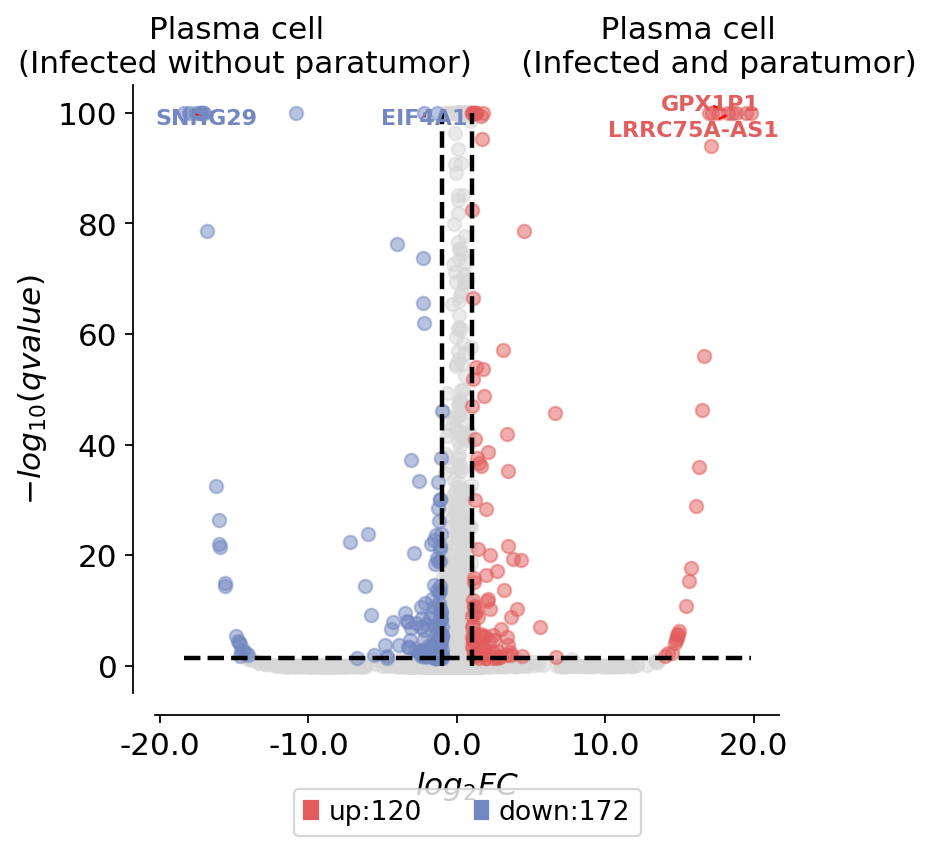

In [15]:
#dds.result.loc[dds.result.loc[:,'log2FC']<-5,'log2FC']=-5
#dds.result.loc[dds.result.loc[:,'log2FC']>5,'log2FC']=5
ax = dds.plot_volcano(title='Plasma cell                            Plasma cell \n(Infected without paratumor)     (Infected and paratumor)',figsize=(5,5),
                 plot_genes_num=5,plot_genes_fontsize=10,legend_bbox=(0.80, -0.135),)#plot_genes=['GZMK','CTLA4','GNLY'])
plt.savefig("/storage/zengjianyangLab/hulei/Gastric/Figure/sFigure6/sFigure6_F.png",dpi=300,bbox_inches = 'tight')

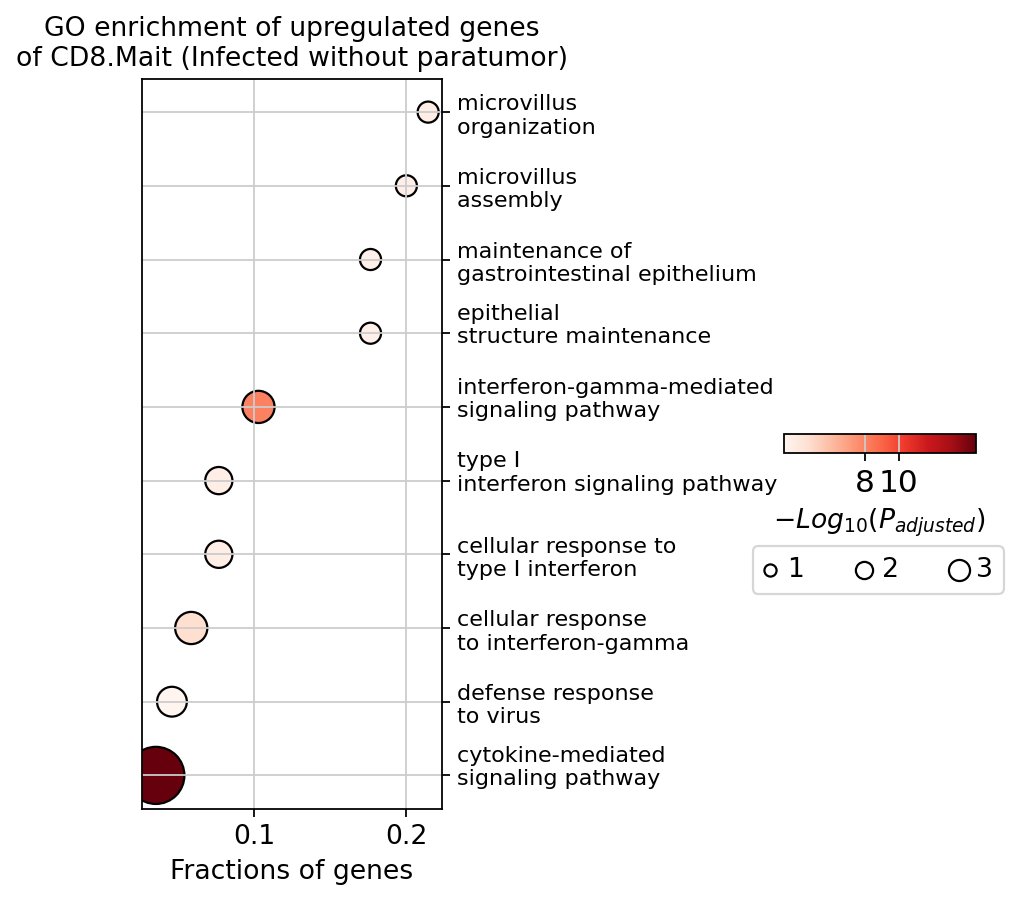

In [16]:
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']<0)].index.tolist() #只富集高表达的基因
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ax = ov.bulk.geneset_plot(enr,figsize=(2.4,6),fig_title='GO enrichment of upregulated genes\nof CD8.Mait (Infected without paratumor)',
                          node_size=[1, 2, 3],
                          cax_loc=[1.85, 0.52, 0.5, 0.02],
                          bbox_to_anchor_used=(-0.23, -8),node_diameter=30,custom_ticks=[8,10],
                        cmap='Reds')
#plt.savefig('Gastric/Figure/sFigure4/sFigure4_F',dpi=300,bbox_inches = 'tight')

In [17]:
for i in enr.loc[:,'Term']:
    print(i)

cellular response to interferon-gamma (GO:0071346)
cellular response to type I interferon (GO:0071357)
cytokine-mediated signaling pathway (GO:0019221)
defense response to virus (GO:0051607)
epithelial structure maintenance (GO:0010669)
interferon-gamma-mediated signaling pathway (GO:0060333)
maintenance of gastrointestinal epithelium (GO:0030277)
microvillus assembly (GO:0030033)
microvillus organization (GO:0032528)
mitotic cell cycle checkpoint signaling (GO:0007093)
negative regulation of lymphocyte activation (GO:0051250)
positive regulation of signal transduction by p53 class mediator (GO:1901798)
postsynaptic endocytosis (GO:0140239)
postsynaptic neurotransmitter receptor internalization (GO:0098884)
type I interferon signaling pathway (GO:0060337)


In [18]:
enr = enr[enr.loc[:,'Term'].isin(['cellular response to interferon-gamma (GO:0071346)',
                                  'cellular response to type I interferon (GO:0071357)',
                                  'cytokine-mediated signaling pathway (GO:0019221)',
                                  'type I interferon signaling pathway (GO:0060337)','defense response to virus (GO:0051607)',
                                  'interferon-gamma-mediated signaling pathway (GO:0060333)'
])]
enr


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,logp,logc,num,fraction
151,CUSTOM23215251238208,cellular response to interferon-gamma (GO:0071...,7/119,2.230534e-05,8.847786e-03,9.242059,HLA-DQB1;TRIM22;HLA-DRB5;GBP1;OASL;IFI30;GBP2,4.727588,2.223765,7,0.058824
174,CUSTOM23215251238208,cellular response to type I interferon (GO:007...,5/65,9.765909e-05,2.324286e-02,12.210319,MX1;MX2;OASL;XAF1;GBP2,3.761757,2.502281,5,0.076923
197,CUSTOM23215251238208,cytokine-mediated signaling pathway (GO:0019221),22/618,4.244509e-10,5.050966e-07,5.904989,SOCS3;LCP1;XAF1;IFI30;MX1;HLA-DQB1;TRIM22;BCL6...,14.498516,1.775798,22,0.035599
211,CUSTOM23215251238208,defense response to virus (GO:0051607),6/130,3.300954e-04,3.903544e-02,7.273761,MX1;FLNA;PMAIP1;MX2;OASL;CXCL10,3.243285,1.984274,6,0.046154
280,CUSTOM23215251238208,interferon-gamma-mediated signaling pathway (G...,7/68,5.208715e-07,3.099185e-04,16.166463,TRIM22;HLA-DQB1;HLA-DRB5;GBP1;OASL;IFI30;GBP2,8.079201,2.782939,7,0.102941
1184,CUSTOM23215251238208,type I interferon signaling pathway (GO:0060337),5/65,9.765909e-05,2.324286e-02,12.210319,MX1;MX2;OASL;XAF1;GBP2,3.761757,2.502281,5,0.076923


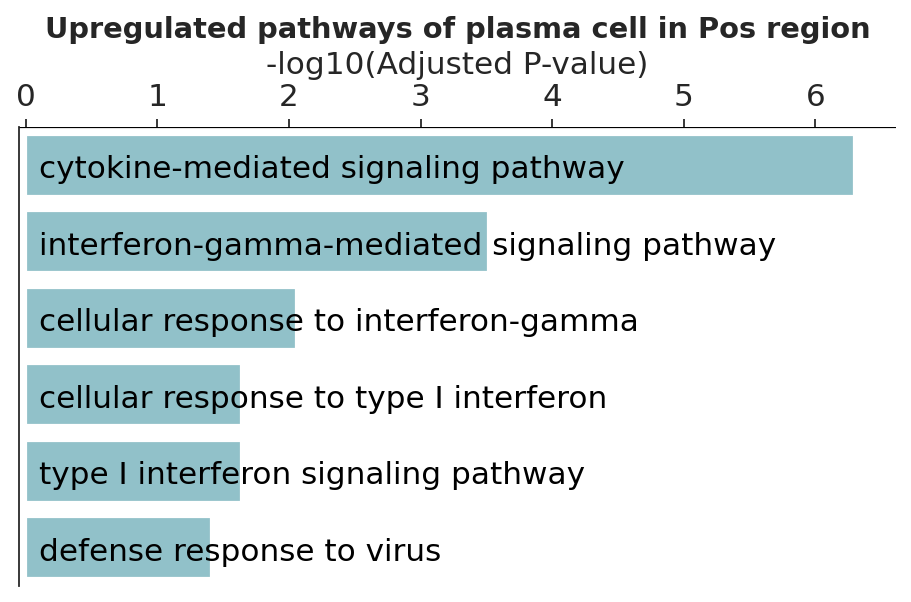

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('white')

enr['Term'] = enr['Term'].str.replace('\(GO:\d+\)', '', regex=True)
enr['-log10(Adjusted P-value)'] = -np.log10(enr['Adjusted P-value'])
enr_sorted = enr.sort_values('-log10(Adjusted P-value)', ascending=False)


f, ax = plt.subplots(1, 1, figsize=(6, 4), sharex=True) 
colors = [ov.pl.blue_color[4]]*len(enr.index) 
barplot = sns.barplot(x="-log10(Adjusted P-value)", y="Term", data=enr_sorted, palette=colors, ax=ax)

sns.set_color_codes("muted")
sns.despine(bottom=True)

for i, p in enumerate(ax.patches):  #
    ax.text(p.get_x() + 0.1, p.get_y() + p.get_height() / 2. + 0.05, f'{enr_sorted["Term"].iloc[i]}', 
            ha='left', va='center', color='black')

ax.axhline(y=-0.5, color='black', linewidth=1)

ax.set_ylabel('')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(left=-0.05)  # 
ax.set_title('Upregulated pathways of plasma cell in Pos region', fontsize=13,fontweight='bold')
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout(h_pad=2)
plt.savefig("Gastric/Figure/sFigure6/sFigure6_G.png",dpi=300,bbox_inches = 'tight')
plt.show()

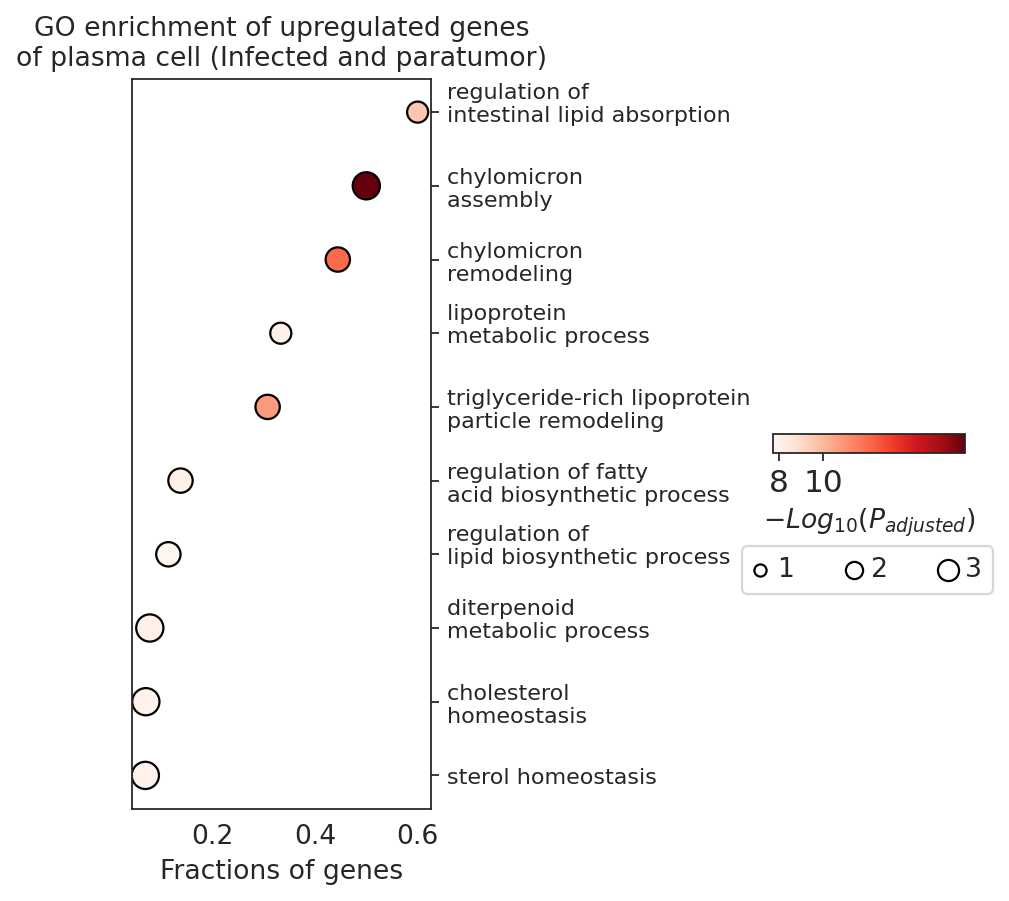

In [20]:
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']>0)].index.tolist() #只富集高表达的基因
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ax = ov.bulk.geneset_plot(enr,figsize=(2.4,6),fig_title='GO enrichment of upregulated genes\nof plasma cell (Infected and paratumor)',
                          node_size=[1, 2, 3],
                          cax_loc=[1.85, 0.52, 0.5, 0.02],
                          bbox_to_anchor_used=(-0.23, -8),node_diameter=30,custom_ticks=[8,10],
                        cmap='Reds')

In [21]:
enr = enr[enr.loc[:,'Term'].isin(['positive regulation of lipid biosynthetic process (GO:0046889)',
                                  'positive regulation of lipid catabolic process (GO:0050996)',
                                  'positive regulation of lipid metabolic process (GO:0045834)',
                                  'mucosal immune response (GO:0002385)',
                                  'regulation of intestinal lipid absorption (GO:1904729)',
                                  'triglyceride-rich lipoprotein particle remodeling (GO:0034370)',
])]
enr


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,logp,logc,num,fraction
259,CUSTOM23214965527616,mucosal immune response (GO:0002385),2/23,2.771812e-03,0.027053,31.862121,PIGR;APOA4,3.609961,3.461418,2,0.086957
439,CUSTOM23214965527616,positive regulation of lipid biosynthetic proc...,2/35,6.349273e-03,0.049443,21.078518,APOA1;APOA4,3.006929,3.048254,2,0.057143
440,CUSTOM23214965527616,positive regulation of lipid catabolic process...,2/22,2.536354e-03,0.025433,33.279965,APOA1;APOA4,3.671707,3.504956,2,0.090909
442,CUSTOM23214965527616,positive regulation of lipid metabolic process...,2/25,3.272323e-03,0.030321,29.360043,APOA1;APOA4,3.495922,3.379635,2,0.080000
586,CUSTOM23214965527616,regulation of intestinal lipid absorption (GO:...,3/5,3.778410e-07,0.000069,193.826182,PRAP1;APOA1;APOA4,9.579306,5.266962,3,0.600000
719,CUSTOM23214965527616,triglyceride-rich lipoprotein particle remodel...,4/13,8.639321e-08,0.000021,103.135501,APOC3;APOB;APOA1;APOA4,10.767189,4.636044,4,0.307692


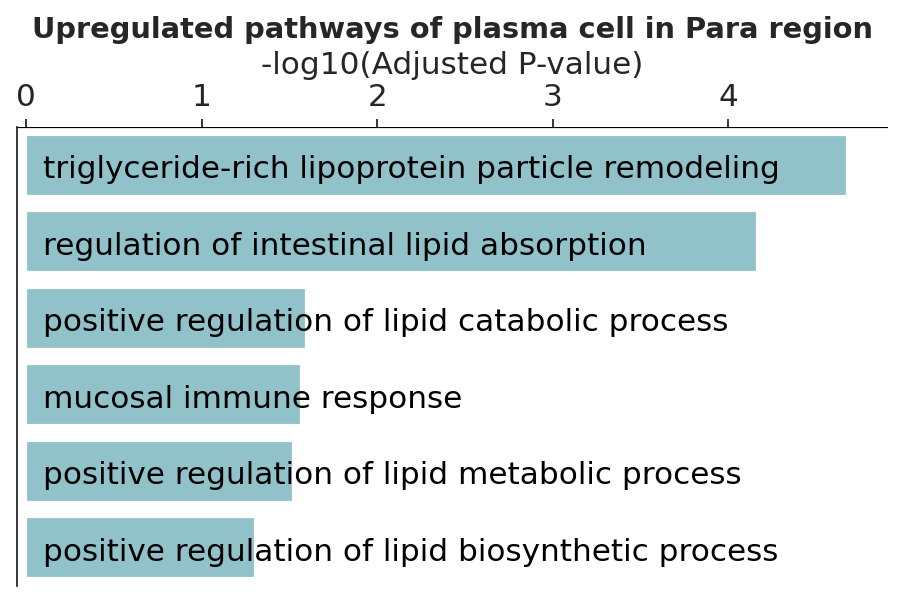

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('white')

# 假设 'enr' 是你的DataFrame，以下是一个示例数据构建方式
# 这里添加了一个 'pvalue' 列

# 去除GO:xxxxxx的标签
enr['Term'] = enr['Term'].str.replace('\(GO:\d+\)', '', regex=True)
# 计算 -log10(pvalue) 并排序
enr['-log10(Adjusted P-value)'] = -np.log10(enr['Adjusted P-value'])
enr_sorted = enr.sort_values('-log10(Adjusted P-value)', ascending=False)


# 创建条形图
f, ax = plt.subplots(1, 1, figsize=(6, 4), sharex=True)  # 调整 figsize 以适应更多条目
colors = [ov.pl.blue_color[4]]*len(enr.index)  # 示例颜色
barplot = sns.barplot(x="-log10(Adjusted P-value)", y="Term", data=enr_sorted, palette=colors, ax=ax)

sns.set_color_codes("muted")
sns.despine(bottom=True)

for i, p in enumerate(ax.patches):  # 正确使用 ax.patches
    ax.text(p.get_x() + 0.1, p.get_y() + p.get_height() / 2. + 0.05, f'{enr_sorted["Term"].iloc[i]}', 
            ha='left', va='center', color='black')

ax.axhline(y=-0.5, color='black', linewidth=1)

ax.set_ylabel('')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(left=-0.05)  # 可以根据实际需要调整
ax.set_title('Upregulated pathways of plasma cell in Para region', fontsize=13,fontweight='bold')
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout(h_pad=2)
plt.savefig("/storage/zengjianyangLab/hulei/Gastric/Figure/sFigure6/sFigure6_H.png",dpi=300,bbox_inches = 'tight')
plt.show()

In [ ]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('white')
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
##Assest all pathways
B_raw_used = B_raw.raw.to_adata()

pathway_name = 'mucosal immune response (GO:0002385)'
pathway_gene = pathway_dict[pathway_name]
sc.tl.score_genes(B_raw_used, pathway_gene, score_name=pathway_name+' score')

plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=B_raw_used.obs,
                    x="Sample", y=pathway_name+" score", palette=B_raw_used.uns['Sample_colors']).axes

ax.set_xlabel('')
ax.set_ylabel('GO Pathway score')
sns.despine()


sample_data = B_raw_used
group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs[pathway_name+' score']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs[pathway_name+' score']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs[pathway_name+' score']

t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'p-value= {p_value:.2e}' if p_value < 0.0001 else f'p-value= {p_value:.4f}'
    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.003, p_value_str, ha='center', va='bottom', color='black',fontsize=12)

ax.set_title('Mucosal immune response'+'\nGO pathway score of plasma cell',fontsize=14)

add_stat_annotation(ax, [0, 1], p_value_neg_pos, offset=0)
add_stat_annotation(ax, [0, 2], p_value_neg_para, offset=0.15)
add_stat_annotation(ax, [1, 2], p_value_pos_para, offset=0.3)

plt.savefig("Gastric/Figure/sFigure6/sFigure6_I.png",dpi=300,bbox_inches = 'tight')


In [ ]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('white')
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
##Assest all pathways
#B_raw = B_raw.raw.to_adata()

pathway_name = 'cytokine-mediated signaling pathway (GO:0019221)'
pathway_gene = pathway_dict[pathway_name]
sc.tl.score_genes(B_raw_used, pathway_gene, score_name=pathway_name+' score')

plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=B_raw_used.obs,
                    x="Sample", y=pathway_name+" score", palette=B_raw_used.uns['Sample_colors']).axes

ax.set_xlabel('')
ax.set_ylabel('GO Pathway score')
sns.despine()


sample_data = B_raw_used
group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs[pathway_name+' score']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs[pathway_name+' score']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs[pathway_name+' score']

t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'p-value= {p_value:.2e}' if p_value < 0.0001 else f'p-value= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.003, p_value_str, ha='center', va='bottom', color='black',fontsize=12)

ax.set_title('Cytokine-mediated signaling pathway'+'\nGO pathway score of plasma cell',fontsize=14)

add_stat_annotation(ax, [0, 1], p_value_neg_pos, offset=0)
add_stat_annotation(ax, [0, 2], p_value_neg_para, offset=0.15)
add_stat_annotation(ax, [1, 2], p_value_pos_para, offset=0.3)
plt.savefig("Gastric/Figure/sFigure6/sFigure6_J.png",dpi=300,bbox_inches = 'tight')
